In [248]:
from matplotlib.ticker import StrMethodFormatter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [249]:
data = pd.read_excel('E:/Pekerjaan/New Folder/Online Retail.xlsx')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [250]:
#mengembalikan index menjadi kolom
data = data.reset_index()  

In [251]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   index        541909 non-null  int64         
 1   InvoiceNo    541909 non-null  object        
 2   StockCode    541909 non-null  object        
 3   Description  540455 non-null  object        
 4   Quantity     541909 non-null  int64         
 5   InvoiceDate  541909 non-null  datetime64[ns]
 6   UnitPrice    541909 non-null  float64       
 7   CustomerID   406829 non-null  float64       
 8   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 37.2+ MB


In [252]:
data.isna().sum()

index               0
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [253]:
data['Description'].fillna('Unknown', inplace=True)
data['CustomerID'].fillna('0', inplace=True)

In [254]:
data.isna().sum()

index          0
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [255]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   index        541909 non-null  int64         
 1   InvoiceNo    541909 non-null  object        
 2   StockCode    541909 non-null  object        
 3   Description  541909 non-null  object        
 4   Quantity     541909 non-null  int64         
 5   InvoiceDate  541909 non-null  datetime64[ns]
 6   UnitPrice    541909 non-null  float64       
 7   CustomerID   541909 non-null  object        
 8   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 37.2+ MB


In [259]:
data['CustomerID'] = pd.to_numeric(data['CustomerID'], errors='coerce')

In [260]:
data['CustomerID'] = data['CustomerID'].astype('Int64')

In [262]:
print(data['CustomerID'].dtype)

Int64


# Analyze

In [224]:
data['TotalSales'] = data['Quantity']*data['UnitPrice']

**Revenue of Month**

In [225]:
data = data.set_index('InvoiceDate')
monthly_revenue = data['TotalSales'].resample('M').sum()
monthly_revenue

InvoiceDate
2010-12-31     748957.020
2011-01-31     560000.260
2011-02-28     498062.650
2011-03-31     683267.080
2011-04-30     493207.121
2011-05-31     723333.510
2011-06-30     691123.120
2011-07-31     681300.111
2011-08-31     682680.510
2011-09-30    1019687.622
2011-10-31    1070704.670
2011-11-30    1461756.250
2011-12-31     433668.010
Freq: M, Name: TotalSales, dtype: float64

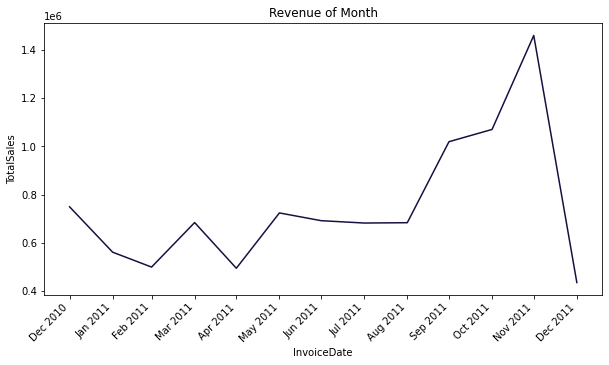

In [226]:
dates = monthly_revenue.index
sales = monthly_revenue.values

plt.figure(figsize=(10, 5))
plt.plot(dates, sales, color='#1B0C41', linewidth=1.5)
plt.xticks(dates, labels=[date.strftime('%b %Y') for date in dates], rotation=45, ha='right') #menampilkan seluruh bulan

plt.xlabel('InvoiceDate')
plt.ylabel('TotalSales')
plt.title('Revenue of Month')

#plt.grid(True)
plt.show()

From the analysis to find out the revenue from December 2010 to December 2011, the highest revenue was in November 2011, with a total of 1,461,756.250. Meanwhile, the lowest revenue was in December 2011, with a total of 433,668.010. This needs deeper analysis to understand why the revenue in December 2011 was very low and dropped significantly compared to November 2011, even though it only took one month.

**Top 10 Produk by TotalSales**

In [227]:
stockcode_sales = data.groupby('StockCode')['TotalSales'].sum()
stockcode_sales_sort = stockcode_sales.sort_values(ascending=False)
stockcode_sales_sort.head(10)

StockCode
DOT       206245.48
22423     164762.19
47566      98302.98
85123A     97894.50
85099B     92356.03
23084      66756.59
POST       66230.64
22086      63791.94
84879      58959.73
79321      53768.06
Name: TotalSales, dtype: float64

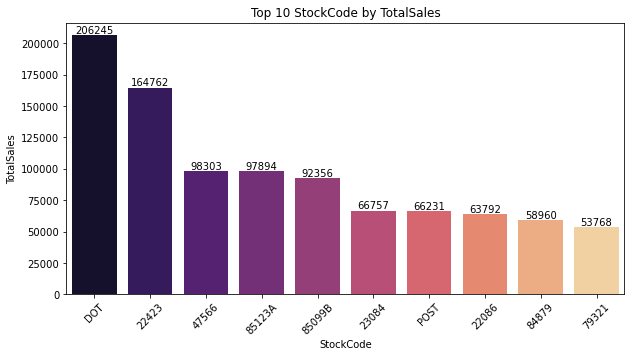

In [228]:
# Ambil 10 besar TotalSales
stockcode_sales_top10 = stockcode_sales_sort.head(10).reset_index()
stockcode_sales_top10.columns = ['StockCode', 'TotalSales']

# Plot ulang
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='StockCode', y='TotalSales', data=stockcode_sales_top10, palette='magma')

for i in ax.containers:  # Loop untuk setiap batang di plot
    ax.bar_label(i, fmt='%.0f', label_type='edge')  # Menampilkan label dengan format angka bulat

plt.xticks(rotation=45)  # Rotasi agar lebih rapi
plt.title('Top 10 StockCode by TotalSales')
plt.show()

In the bar chart above, it shows the revenue from stockcodes (products) by taking the top 10 highest revenues. Stockcode 'DOT' ranks first with revenue of 206,245.48, followed by stockcode '22423' with revenue of 164,762.19, and stockcode '47566' with total revenue of 98,302.98. The tenth stockcode, '79321', has total revenue of 53,768.

This can be concluded that these 10 products have the highest revenue or are the biggest contributors to the total revenue earned by the store.

**Monthly Product Sold**

In [229]:
data = data.reset_index()  

In [230]:
data = data.set_index('InvoiceDate')
monthly_quantity = data['Quantity'].resample('M').sum().reset_index()
monthly_quantity

,InvoiceDate,Quantity
0,2010-12-31,342228
1,2011-01-31,308966
2,2011-02-28,277989
3,2011-03-31,351872
4,2011-04-30,289098
5,2011-05-31,380391
6,2011-06-30,341623
7,2011-07-31,391116
8,2011-08-31,406199
9,2011-09-30,549817


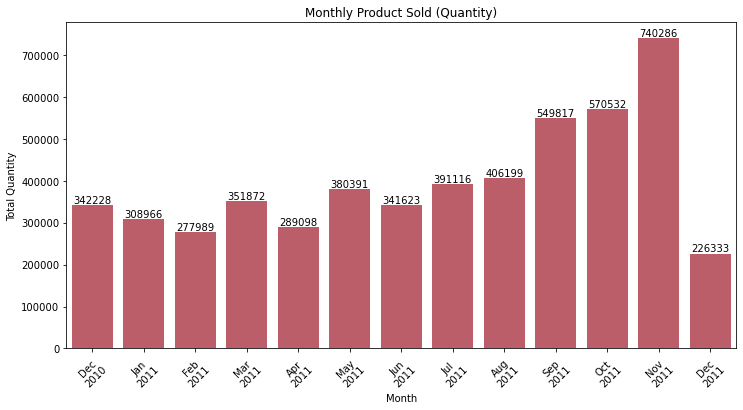

In [231]:
# Mengubah hasil resample menjadi DataFrame
monthly_quantity['Month'] = monthly_quantity['InvoiceDate'].dt.strftime('%b')  # Singkatan nama bulan
monthly_quantity['Year'] = monthly_quantity['InvoiceDate'].dt.year            # Tahun

# Visualisasi menggunakan seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=monthly_quantity['InvoiceDate'], y=monthly_quantity['Quantity'], color='#CA4E5E')

# Menambahkan label di atas batang
for i in ax.containers:
    ax.bar_label(i, fmt='%.0f', label_type='edge')  # Menampilkan angka tanpa desimal

#menampilkan bulan dan tahun
ax.set_xticks(range(len(monthly_quantity)))  # Posisi setiap label
ax.set_xticklabels(
    [f"{row['Month']}\n{row['Year']}" for _, row in monthly_quantity.iterrows()],
    rotation=45
)

# Tambahkan judul dan label sumbu
plt.title('Monthly Product Sold (Quantity)')
plt.xlabel('Month')
plt.ylabel('Total Quantity')

plt.show()

The analysis here aims to find out the number of products sold each month. It can be seen that the highest number of products sold was in November 2011, with a total of 740,286 products, while the lowest number of products sold was in December 2011, with a total of 226,333 products.

This aligns with the revenue analysis done earlier, where the highest revenue was recorded in November 2011, and the lowest in December 2011. It turns out there is a connection between these two findings. The significant difference in revenue between these months is due to the much higher number of products sold in November compared to December. However, further analysis is needed to understand why the number of products sold and the revenue dropped so significantly in just one month.

**The Number of Stockcode**

In [270]:
item = data.groupby('StockCode')['Quantity'].sum()
item_sort = item.sort_values(ascending=False)
item_sort.head()

StockCode
22197     56450
84077     53847
85099B    47363
85123A    38830
84879     36221
Name: Quantity, dtype: int64

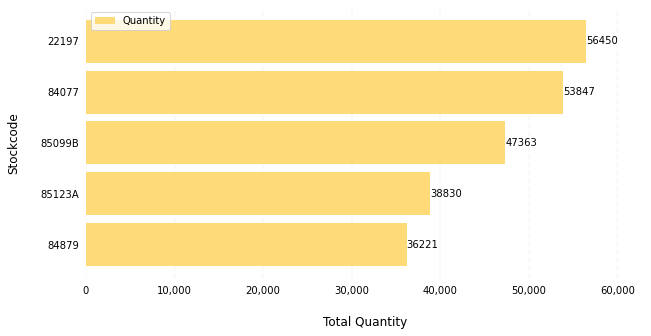

In [271]:
item_top5 = item_sort.head(5).reset_index()
#membalik urutan untuk memastikan visualisasi descending di barh
item_top5 = item_top5.iloc[::-1]

fig, ax = plt.subplots(figsize=(10, 5))
ax = item_top5.plot(
    kind='barh',
    x='StockCode',  # Kolom untuk sumbu y (StockCode)
    y='Quantity',   # Kolom untuk sumbu x (Total Quantity)
    color='#FEDA79',
    zorder=2,
    width=0.85,
    ax=ax
)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom=False, top=False, labelbottom=True, left=False, right=False, labelleft=True)

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

for i in ax.containers:  # Loop untuk setiap batang di plot
    ax.bar_label(i, fmt='%.0f', label_type='edge')  # Menampilkan label dengan format angka bulat

# Set x-axis label
ax.set_xlabel("Total Quantity", labelpad=20, size=12)

# Set y-axis label
ax.set_ylabel("Stockcode", labelpad=20, size=12)

# Format x-axis labels
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

# Tampilkan plot
plt.show()

In this analysis, the top 5 products most frequently sold or purchased by customers over one year were identified. The product with stockcode 22197 ranks first with a total of 5,640 units sold, followed by stockcode 84077 with 53,847 units sold, and in the fifth or last position, stockcode 84879 with 36,221 units sold.

Considering these five stockcodes are the most favored by customers, proper stock management is necessary to minimize stock shortages. Meanwhile, for stockcodes that are rarely purchased by customers, a bundling strategy can be implemented with popular products (those in the top 5). With this strategy, products that are less popular among customers are expected to sell in better quantities compared to not bundling them. Additionally, customers who were previously unaware of these products can discover them through the bundling. This can encourage customers to make purchases of less popular products.

**Total Sales by Country**

In [235]:
country_sales = data.groupby('Country')['TotalSales'].sum()
country_sales_sort = country_sales.sort_values(ascending=False)
country_sales_sort.head()

Country
United Kingdom    8187806.364
Netherlands        284661.540
EIRE               263276.820
Germany            221698.210
France             197403.900
Name: TotalSales, dtype: float64

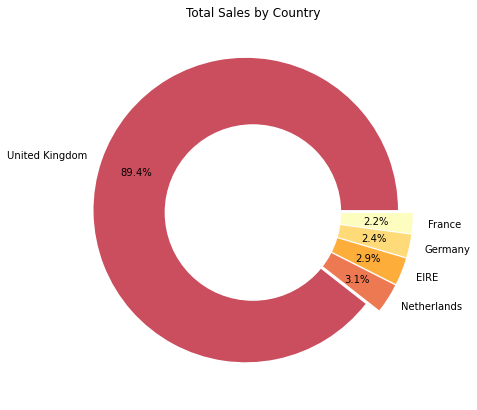

In [236]:
country_top5 = country_sales_sort.head(5).reset_index()

colors = ['#CA4E5E', '#ED7953', '#FDAD3A', '#FEDA79', '#FCFDBF']

# Explosion effect (menyesuaikan dengan jumlah negara)
explode = [0.05] * len(country_top5)
 
# Pie Chart
plt.figure(figsize=(10, 7))
plt.pie(country_top5['TotalSales'], colors=colors, labels=country_top5['Country'], 
        autopct='%1.1f%%', pctdistance=0.76, explode=explode)

# draw circle
centre_circle = plt.Circle((0, 0), 0.58, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
 
# Adding Title of chart
plt.title('Total Sales by Country')
 
# Displaying Chart
plt.show()

The displayed donut chart shows the analysis of total revenue by country. The United Kingdom ranks first with total revenue of 8,187,806.364, followed by the Netherlands with 284,661.540. In the fifth or last position is France, with total revenue of 197,403.900.

From this analysis, it is important to strengthen marketing strategies in high-revenue countries like the United Kingdom to maintain their contribution. Meanwhile, for countries with lower revenue, strategies to increase brand awareness can be implemented, such as offering special promotions, improving product distribution, or running better advertising campaigns. With these steps, revenue from low-contributing countries is expected to increase, positively impacting total revenue overall.

In [237]:
country_sales = data.groupby('Country')['Quantity'].sum()
country_sales_sort = country_sales.sort_values(ascending=False)
country_sales_sort.head()

Country
United Kingdom    4263829
Netherlands        200128
EIRE               142637
Germany            117448
France             110480
Name: Quantity, dtype: int64

**Total Customer by Country**

In [238]:
countrycust_num = data.groupby('Country')['CustomerID'].nunique()
countrycust_num_sort = countrycust_num.sort_values(ascending=False)
countrycust_num_sort.head()

Country
United Kingdom    3951
Germany             95
France              88
Spain               31
Belgium             25
Name: CustomerID, dtype: int64

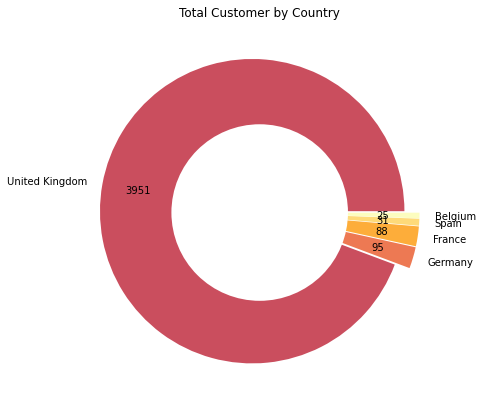

In [239]:
countrycust_top5 = countrycust_num_sort.head(5).reset_index()

colors = ['#CA4E5E', '#ED7953', '#FDAD3A', '#FEDA79', '#FCFDBF']

# Explosion effect (menyesuaikan dengan jumlah negara)
explode = [0.05] * len(countrycust_top5)
 
# Pie Chart
plt.figure(figsize=(10, 7))
plt.pie(countrycust_top5['CustomerID'], colors=colors, labels=countrycust_top5['Country'], 
        autopct=lambda p: '{:.0f}'.format(p * sum(countrycust_top5['CustomerID']) / 100), 
        pctdistance=0.76, explode=explode)

# draw circle
centre_circle = plt.Circle((0, 0), 0.58, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
 
# Adding Title of chart
plt.title('Total Customer by Country')
 
# Displaying Chart
plt.show()

In this analysis, the top 5 countries are shown based on the number of customers who made purchases at the store. The country with the highest number of customers in the past year is the United Kingdom, with 3,951 customers, followed by Germany with 95 customers, France with 88 customers, Spain with 31 customers, and finally, Belgium with 25 customers.

Although these 5 countries have the most customers shopping at the store, it is possible that the number of customers doesn't always relate to a large number of products being purchased. This can be seen in Spain and Belgium, which, despite having many customers, are not in the top 5 countries with the highest product purchases.

Therefore, marketing strategies should be improved in Spain and Belgium, such as offering special promotions or attractive deals, to increase their product purchases and help them enter the top 5 countries with the highest number of products bought.

**Identifying Repeat Customers**

In [288]:
data_filtered = data[data['CustomerID'] != 0]

customer_transactions = data_filtered.groupby('CustomerID')['InvoiceDate'].nunique()
customer_transactions_sort = customer_transactions.sort_values(ascending=False)
customer_transactions_sort.head(10)

CustomerID
14911    248
12748    225
17841    168
14606    129
15311    118
13089    114
12971     86
14527     85
13408     77
14646     77
Name: InvoiceDate, dtype: int64

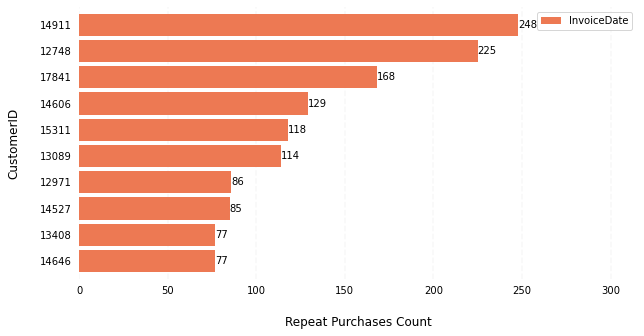

In [287]:
cust_top10 = customer_transactions_sort.head(10).reset_index()
#membalik urutan untuk memastikan visualisasi descending di barh
cust_top10 = cust_top10.iloc[::-1]

fig, ax = plt.subplots(figsize=(10, 5))
ax = cust_top10.plot(
    kind='barh',
    x='CustomerID',  # Kolom untuk sumbu y (StockCode)
    y='InvoiceDate',   # Kolom untuk sumbu x (Total Quantity)
    color='#ED7953',
    zorder=2,
    width=0.85,
    ax=ax
)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom=False, top=False, labelbottom=True, left=False, right=False, labelleft=True)

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

for i in ax.containers:  # Loop untuk setiap batang di plot
    ax.bar_label(i, fmt='%.0f', label_type='edge')  # Menampilkan label dengan format angka bulat

# Set x-axis label
ax.set_xlabel("Repeat Purchases Count", labelpad=20, size=12)

# Set y-axis label
ax.set_ylabel("CustomerID", labelpad=20, size=12)

# Format x-axis labels
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

# Tampilkan plot
plt.show()

This analysis aims to determine whether customers make repeat purchases at the store and to calculate how often customers visit the store to shop. The bar chart above shows that the customer with ID 14911 is the most frequent shopper, with a total of 248 visits. Next, the customer with ID 12748 made 225 visits, followed by the customer with ID 17841 with 168 visits, down to the customer in the tenth position, ID 14646, who visited 77 times.

To maintain and even increase the shopping frequency of these customers, special programs such as discounts or attractive offers should be implemented. Additionally, further efforts are needed for customers who have only made a single purchase or visit, such as providing promotions or engaging communications. This way, these customers may become more interested in returning to the store and increasing their spending.